# Modelli di Regressione Logistica <br>+ Pipeline, CV e Tuning degli Iperparametri

## Apprendimento Automatico | LM in Data Science

##      

da Python Machine Learning - Code Examples | Ch. 6 e doc. sklearn

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

## Workflow con Pipeline

### Caricamento del dataset Breast Cancer Wisconsin 

In [9]:
import pandas as pd

# da remoto
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# alternativa locale: 
df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
print("shape:", df.shape)
print("Valori nulli:\n", df.isnull().sum())

shape: (569, 32)
Valori nulli:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [12]:
le.transform(['M', 'B']) # ESEMPIO

array([1, 0])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

### Combinazione di _transformer_ ed _estimator_ in una pipeline

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=2),
                     LogisticRegression(random_state=1))

#pipe = make_pipeline(StandardScaler(),
#                     PCA(n_components=2),
#                     KNeighborsClassifier(n_neighbors=3))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuratezza (Test): %.3f' % pipe.score(X_test, y_test))

Accuratezza (Test): 0.956


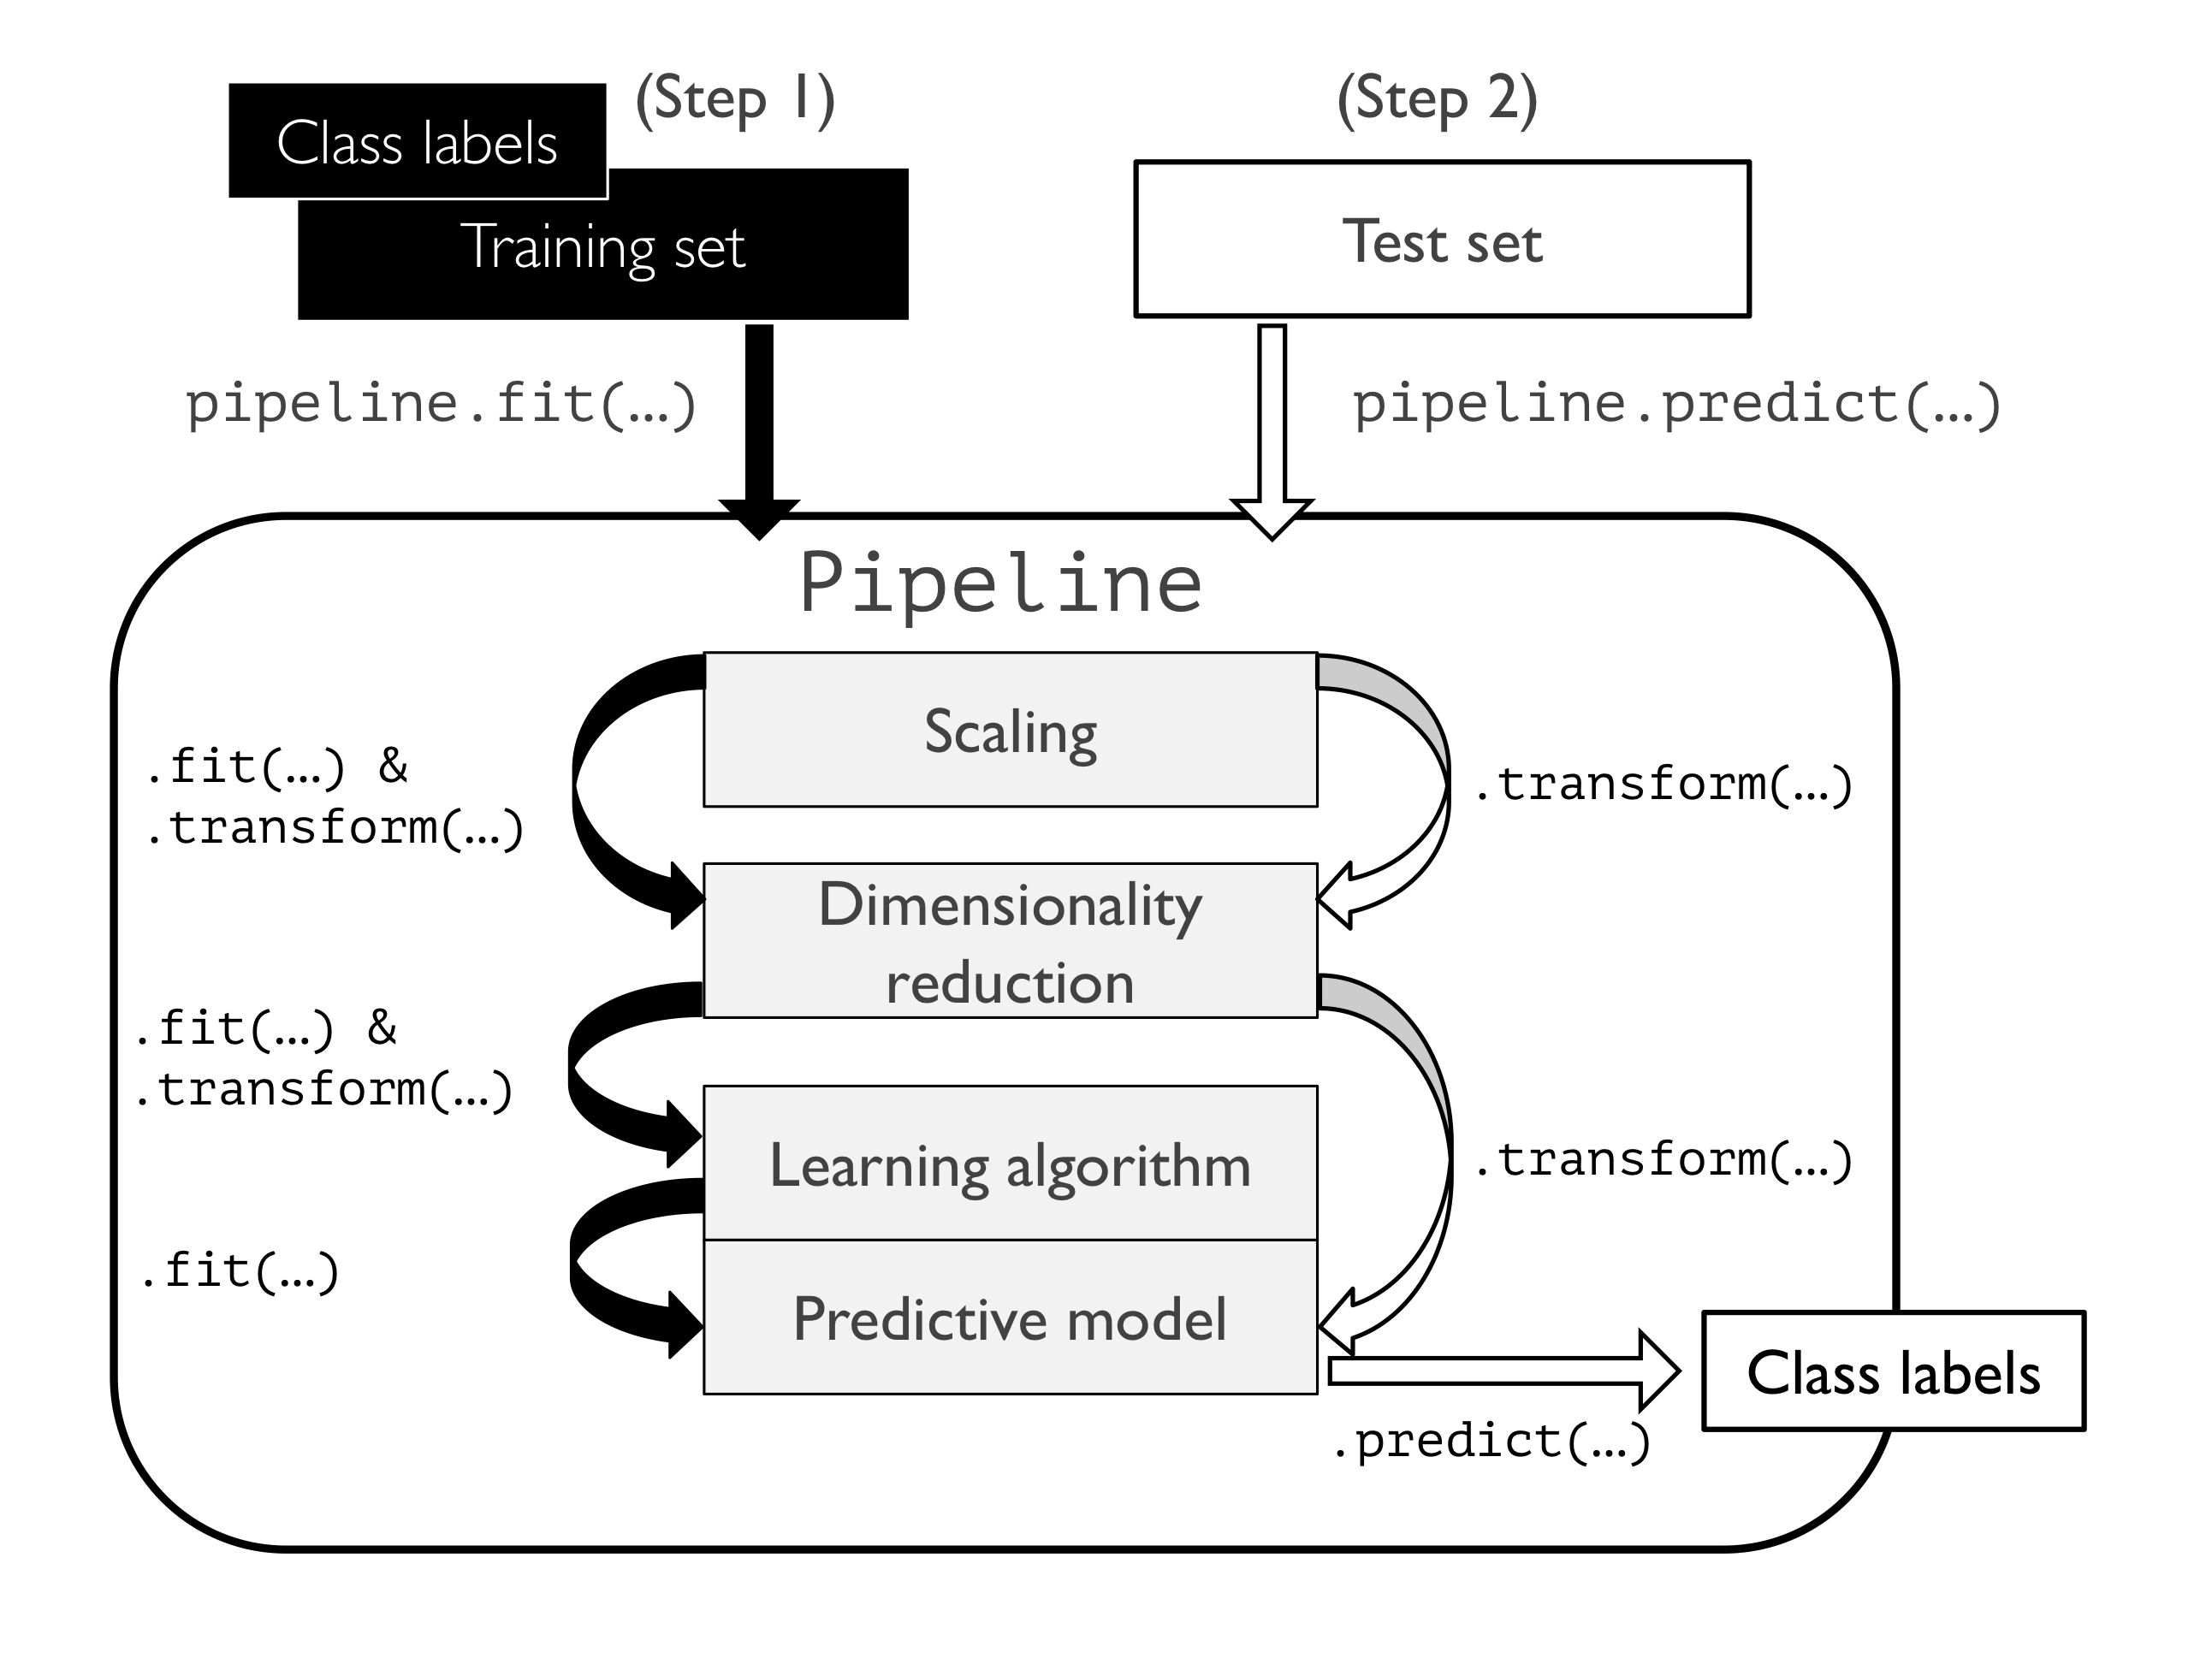

[`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in scikit learn

### Esercizi
+ riusare la stessa pipeline su diverso dataset (es. `Wine`)
+ con lo stesso dataset (`BCW`) modificare la pipeline con diversi transformer (scaling, dim. reduction) e/o estimator (learning)
    - confrontando i risultati con quelli ottenuti con la pipeline precedente
+ creare pipeline per problemi di regressione con `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet` (dopo aver trattato queste classi)

## Valutare i modelli tramite k-Fold Cross Validation

### *holdout*

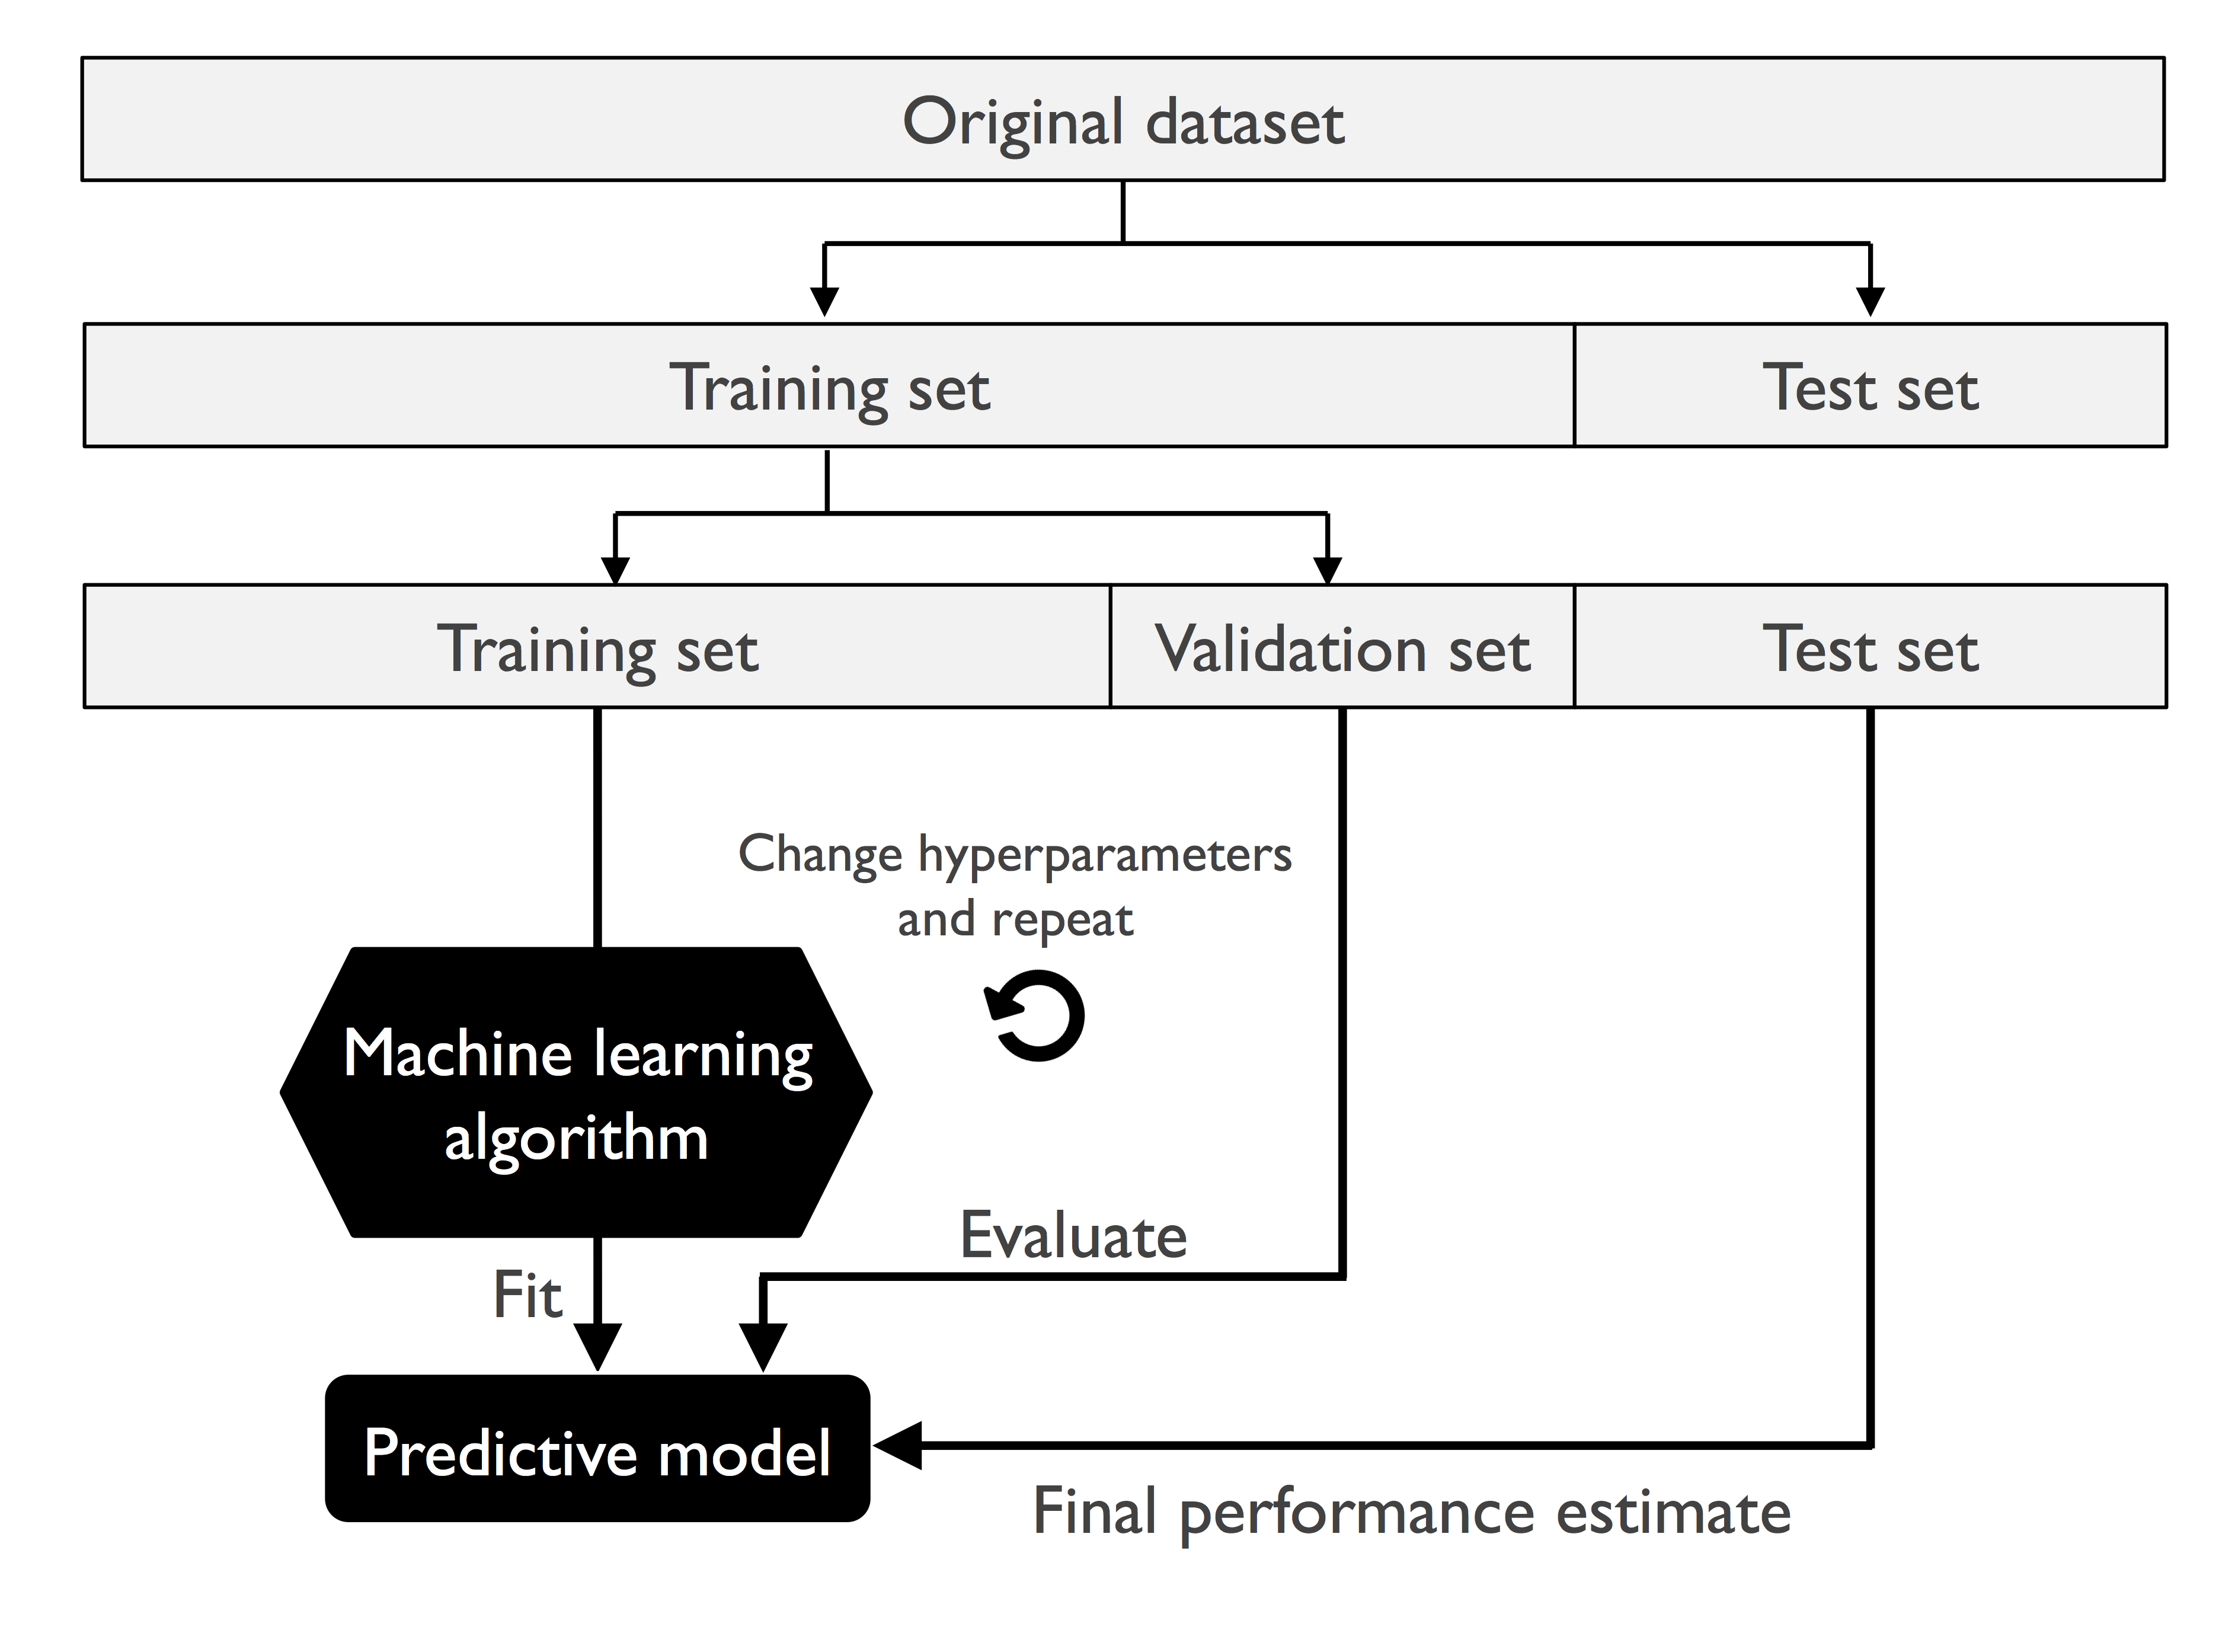

### k-Fold Cross-Validation

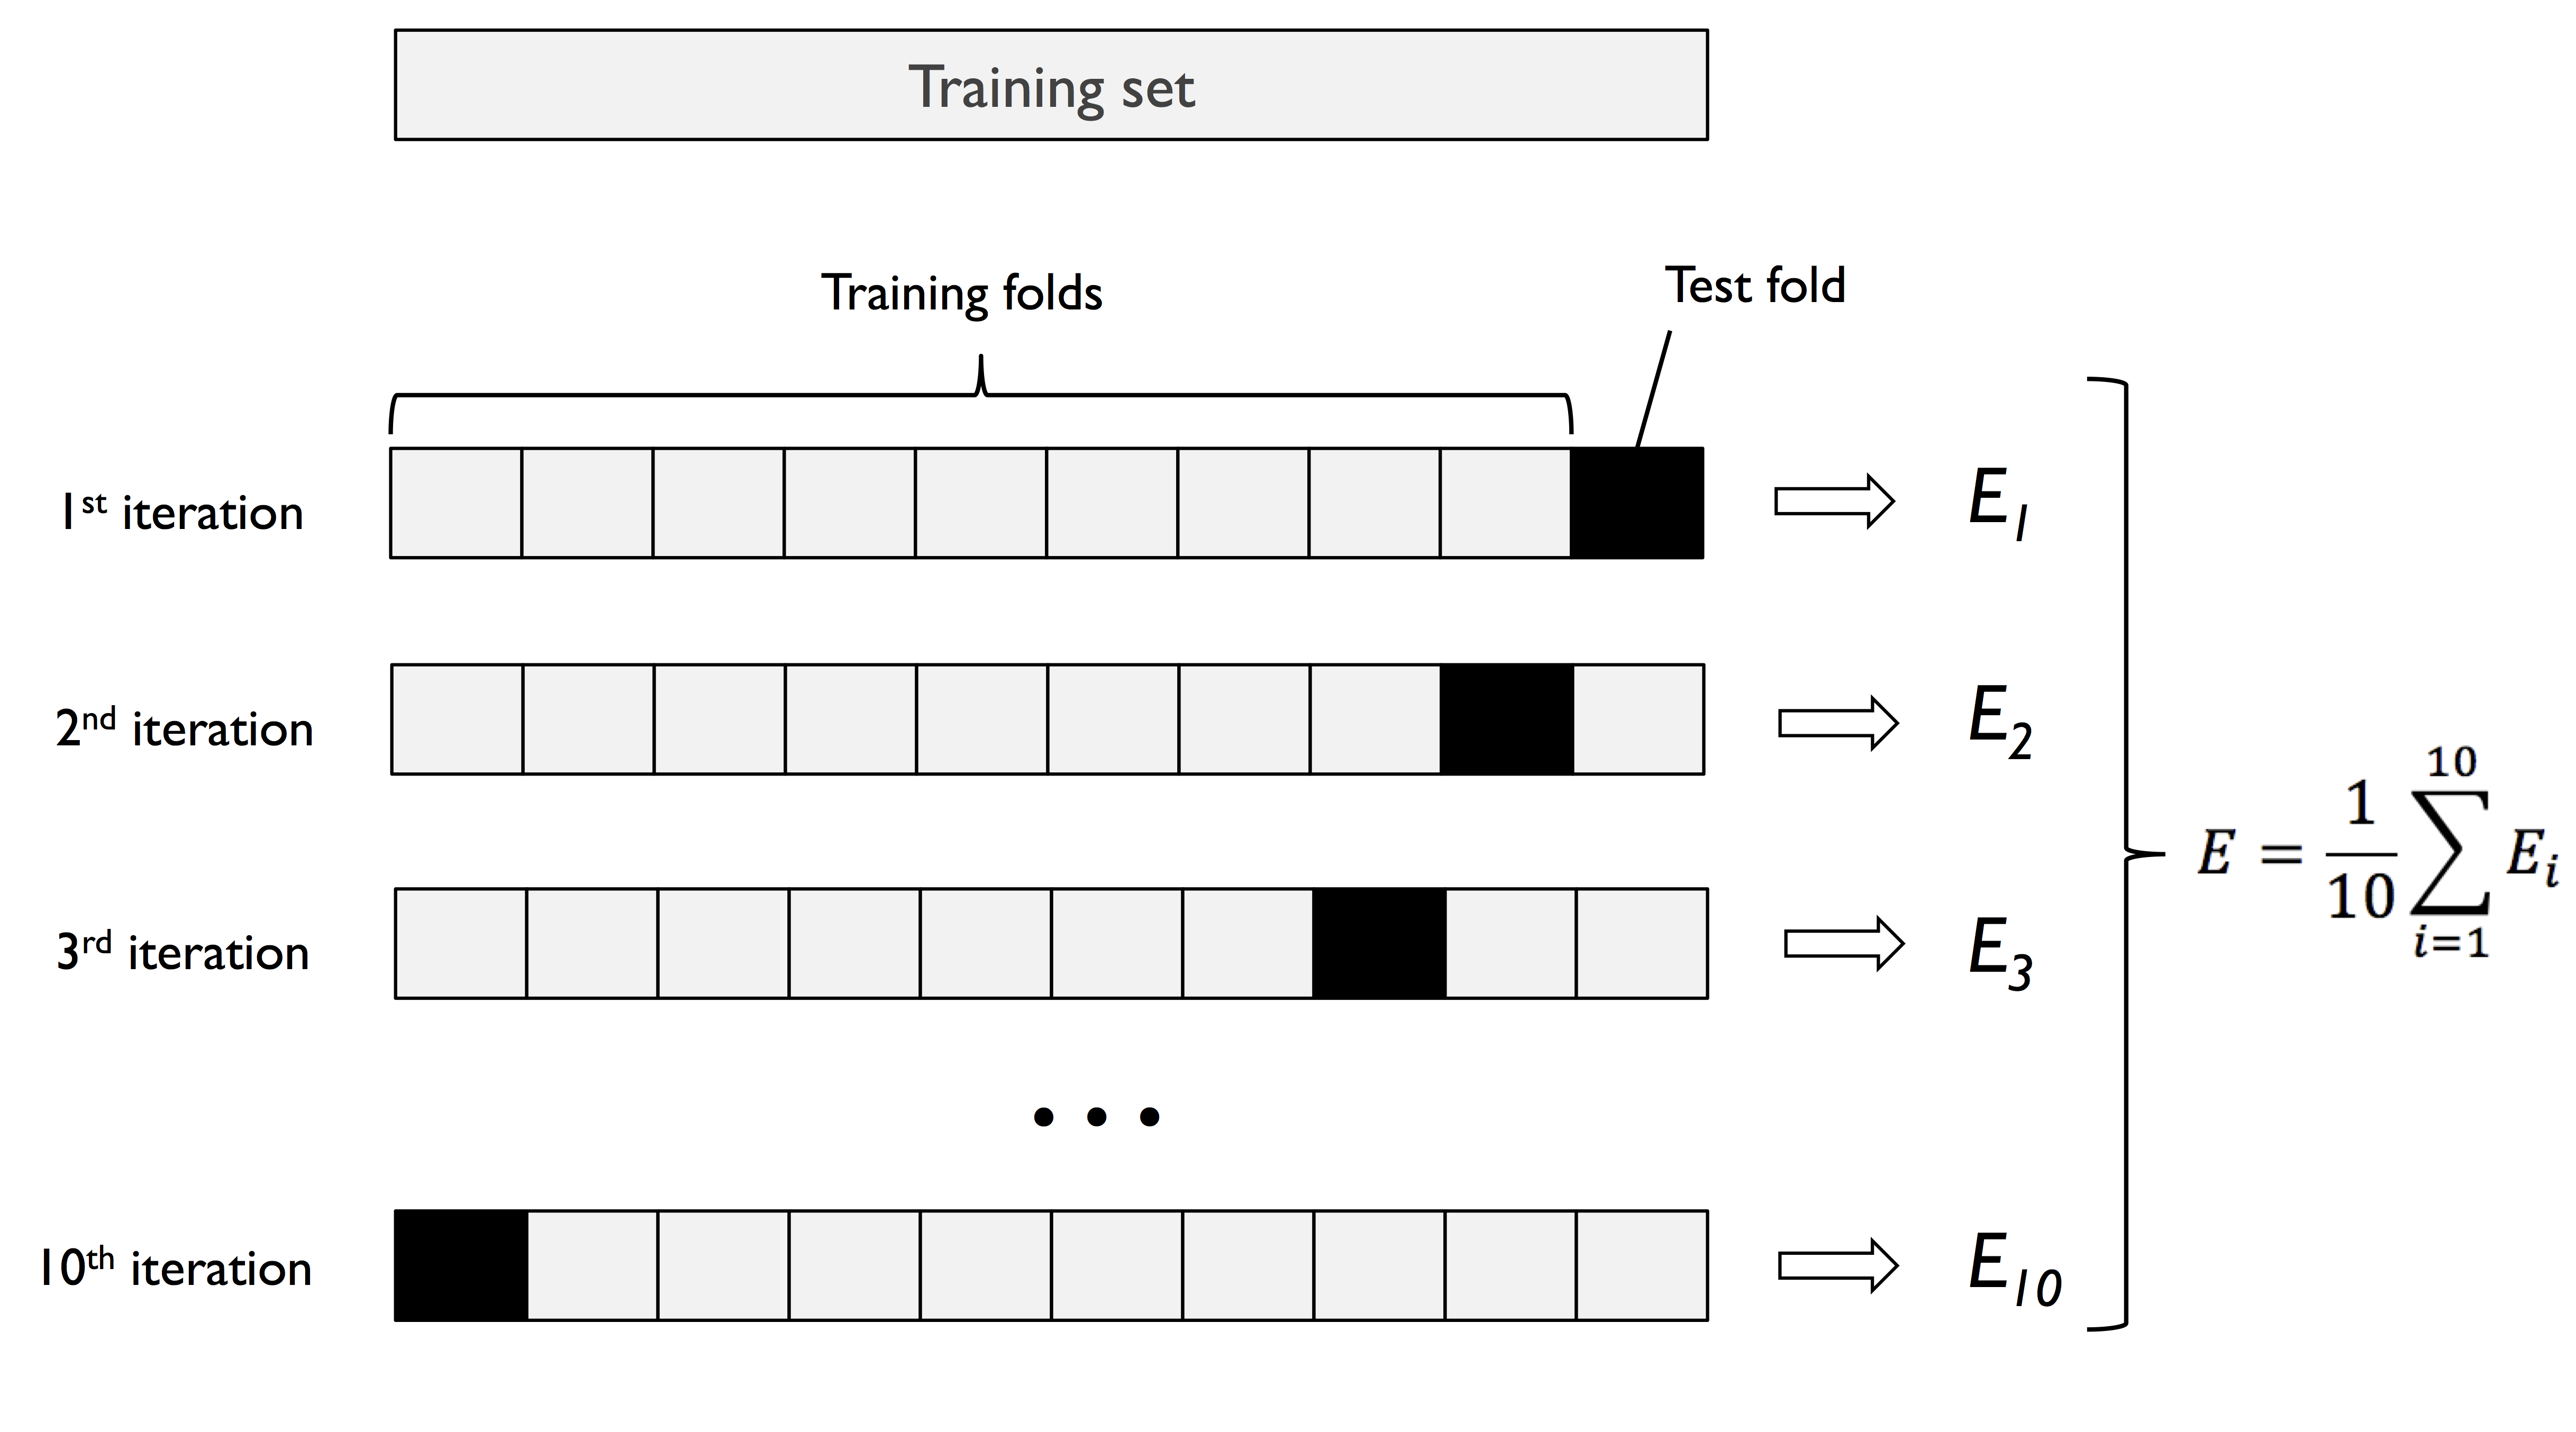

- **Leave-one-out cross-validation** (LOOCV)
    - Caso estremo: $k=N$
- **Stratified cross-validation**: le proporzioni delle varie classi vengono preservate in ogni fold
    + assicura la rappresentatività del dataset (training-set)
- Si può usare l'iteratore [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) di scikit-learn

In [15]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, dist. classi: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nAccuratezza media nella CV: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, dist. classi: [256 153], Acc: 0.935
Fold:  2, dist. classi: [256 153], Acc: 0.935
Fold:  3, dist. classi: [256 153], Acc: 0.957
Fold:  4, dist. classi: [256 153], Acc: 0.957
Fold:  5, dist. classi: [256 153], Acc: 0.935
Fold:  6, dist. classi: [257 153], Acc: 0.956
Fold:  7, dist. classi: [257 153], Acc: 0.978
Fold:  8, dist. classi: [257 153], Acc: 0.933
Fold:  9, dist. classi: [257 153], Acc: 0.956
Fold: 10, dist. classi: [257 153], Acc: 0.956

Accuratezza media nella CV: 0.950 +/- 0.014


Uso di [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#) 
+ per poter _distribuire_ il lavoro delle varie fold su _più CPU_

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('Accuratezze nella CV: %s' % scores)
print('Accuratezza media della CV: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuratezze nella CV: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
Accuratezza media della CV: 0.950 +/- 0.014


### Esercizi
- applicare la CV a (una) pipeline con diversi iperparametri per lo stesso estimator e confrontare i risultati medi
- applicare la CV a pipeline con diverso estimator e confrontare i risultati medi

## Debugging con *Curve di Apprendimento*

### Diagnosi di Problemi di Bias e Varianza mediante Curve di Apprendimento

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', 
                                           solver='lbfgs', 
                                           max_iter=10000, 
                                           random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

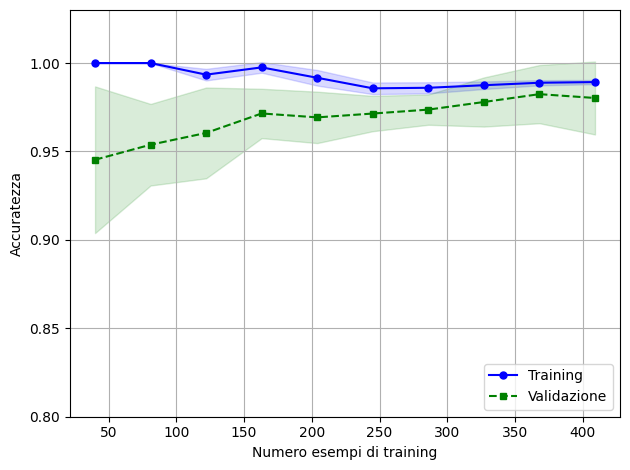

In [18]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', 
         markersize=5, label='Training')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='Validazione')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Numero esempi di training')
plt.ylabel('Accuratezza')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

#### Esercizi

- testare con altri modelli, dataset

## Rilevamento Problemi di Over-/Underfitting mediante Curve di Validazione

Uso di [`validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) e parametro `C` della [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- `C` float, default=`1.0` reciproco del param. di regolarizzazione; positivo (più piccolo $\to$ reg. più forte)


In [19]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

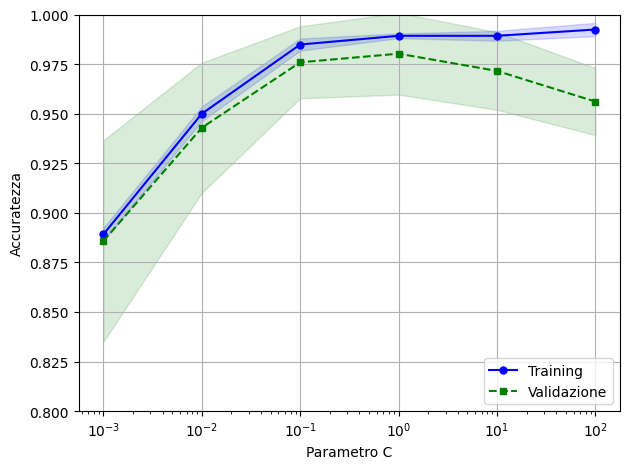

In [20]:
plt.plot(param_range, train_mean, color='blue', marker='o',  
         markersize=5, label='Training')
plt.fill_between(param_range, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--',  
         marker='s', markersize=5,  label='Validazione')
plt.fill_between(param_range, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parametro C')
plt.ylabel('Accuratezza')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

#### Esercizi

- testare con altri metodi, parametri, dataset

## Regolazione Fine di Modelli attraverso *Grid Search*

### Regolazione degli Iperparametri tramite Grid Search

usando [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
che implementa diversi _classificatori lineari_ (SVM, logistic regression, ecc.) addestrati tramite **Discesa di Gradiente Stocastica**

In [21]:
#sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
#                                   max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, 
#                                   learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, 
#                                   n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

pipe_sgd = make_pipeline(StandardScaler(),
                       SGDClassifier(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'sgdclassifier__alpha': param_range, 
               'sgdclassifier__tol': param_range, 
               'sgdclassifier__loss': ['log_loss']},
              {'sgdclassifier__alpha': param_range, 
               'sgdclassifier__tol': param_range},
              # 'hinge' default
             ]

gs = GridSearchCV(estimator=pipe_sgd, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print('miglior valutazione (accu): ',gs.best_score_)
print('migliori valori per gli iperparametri: ',gs.best_params_)

miglior valutazione (accu):  0.9802898550724638
migliori valori per gli iperparametri:  {'sgdclassifier__alpha': 0.01, 'sgdclassifier__tol': 0.0001}


Stima delle prestazioni del _miglior modello_ selezionato<br> disponibile attraverso l'attributo `best_estimator_` di `gs`, applicato al *test set* <br> (esempi indipendenti da quelli di training):

In [23]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# si noti che non serve ri-addestrare il classificatore
# essendo già stato fatto avendo posto refit=True

print('Accuratezza (Test): %.3f' % clf.score(X_test, y_test))

Accuratezza (Test): 0.974


### Algoritmo di Selezione con Cross-validation Annidata

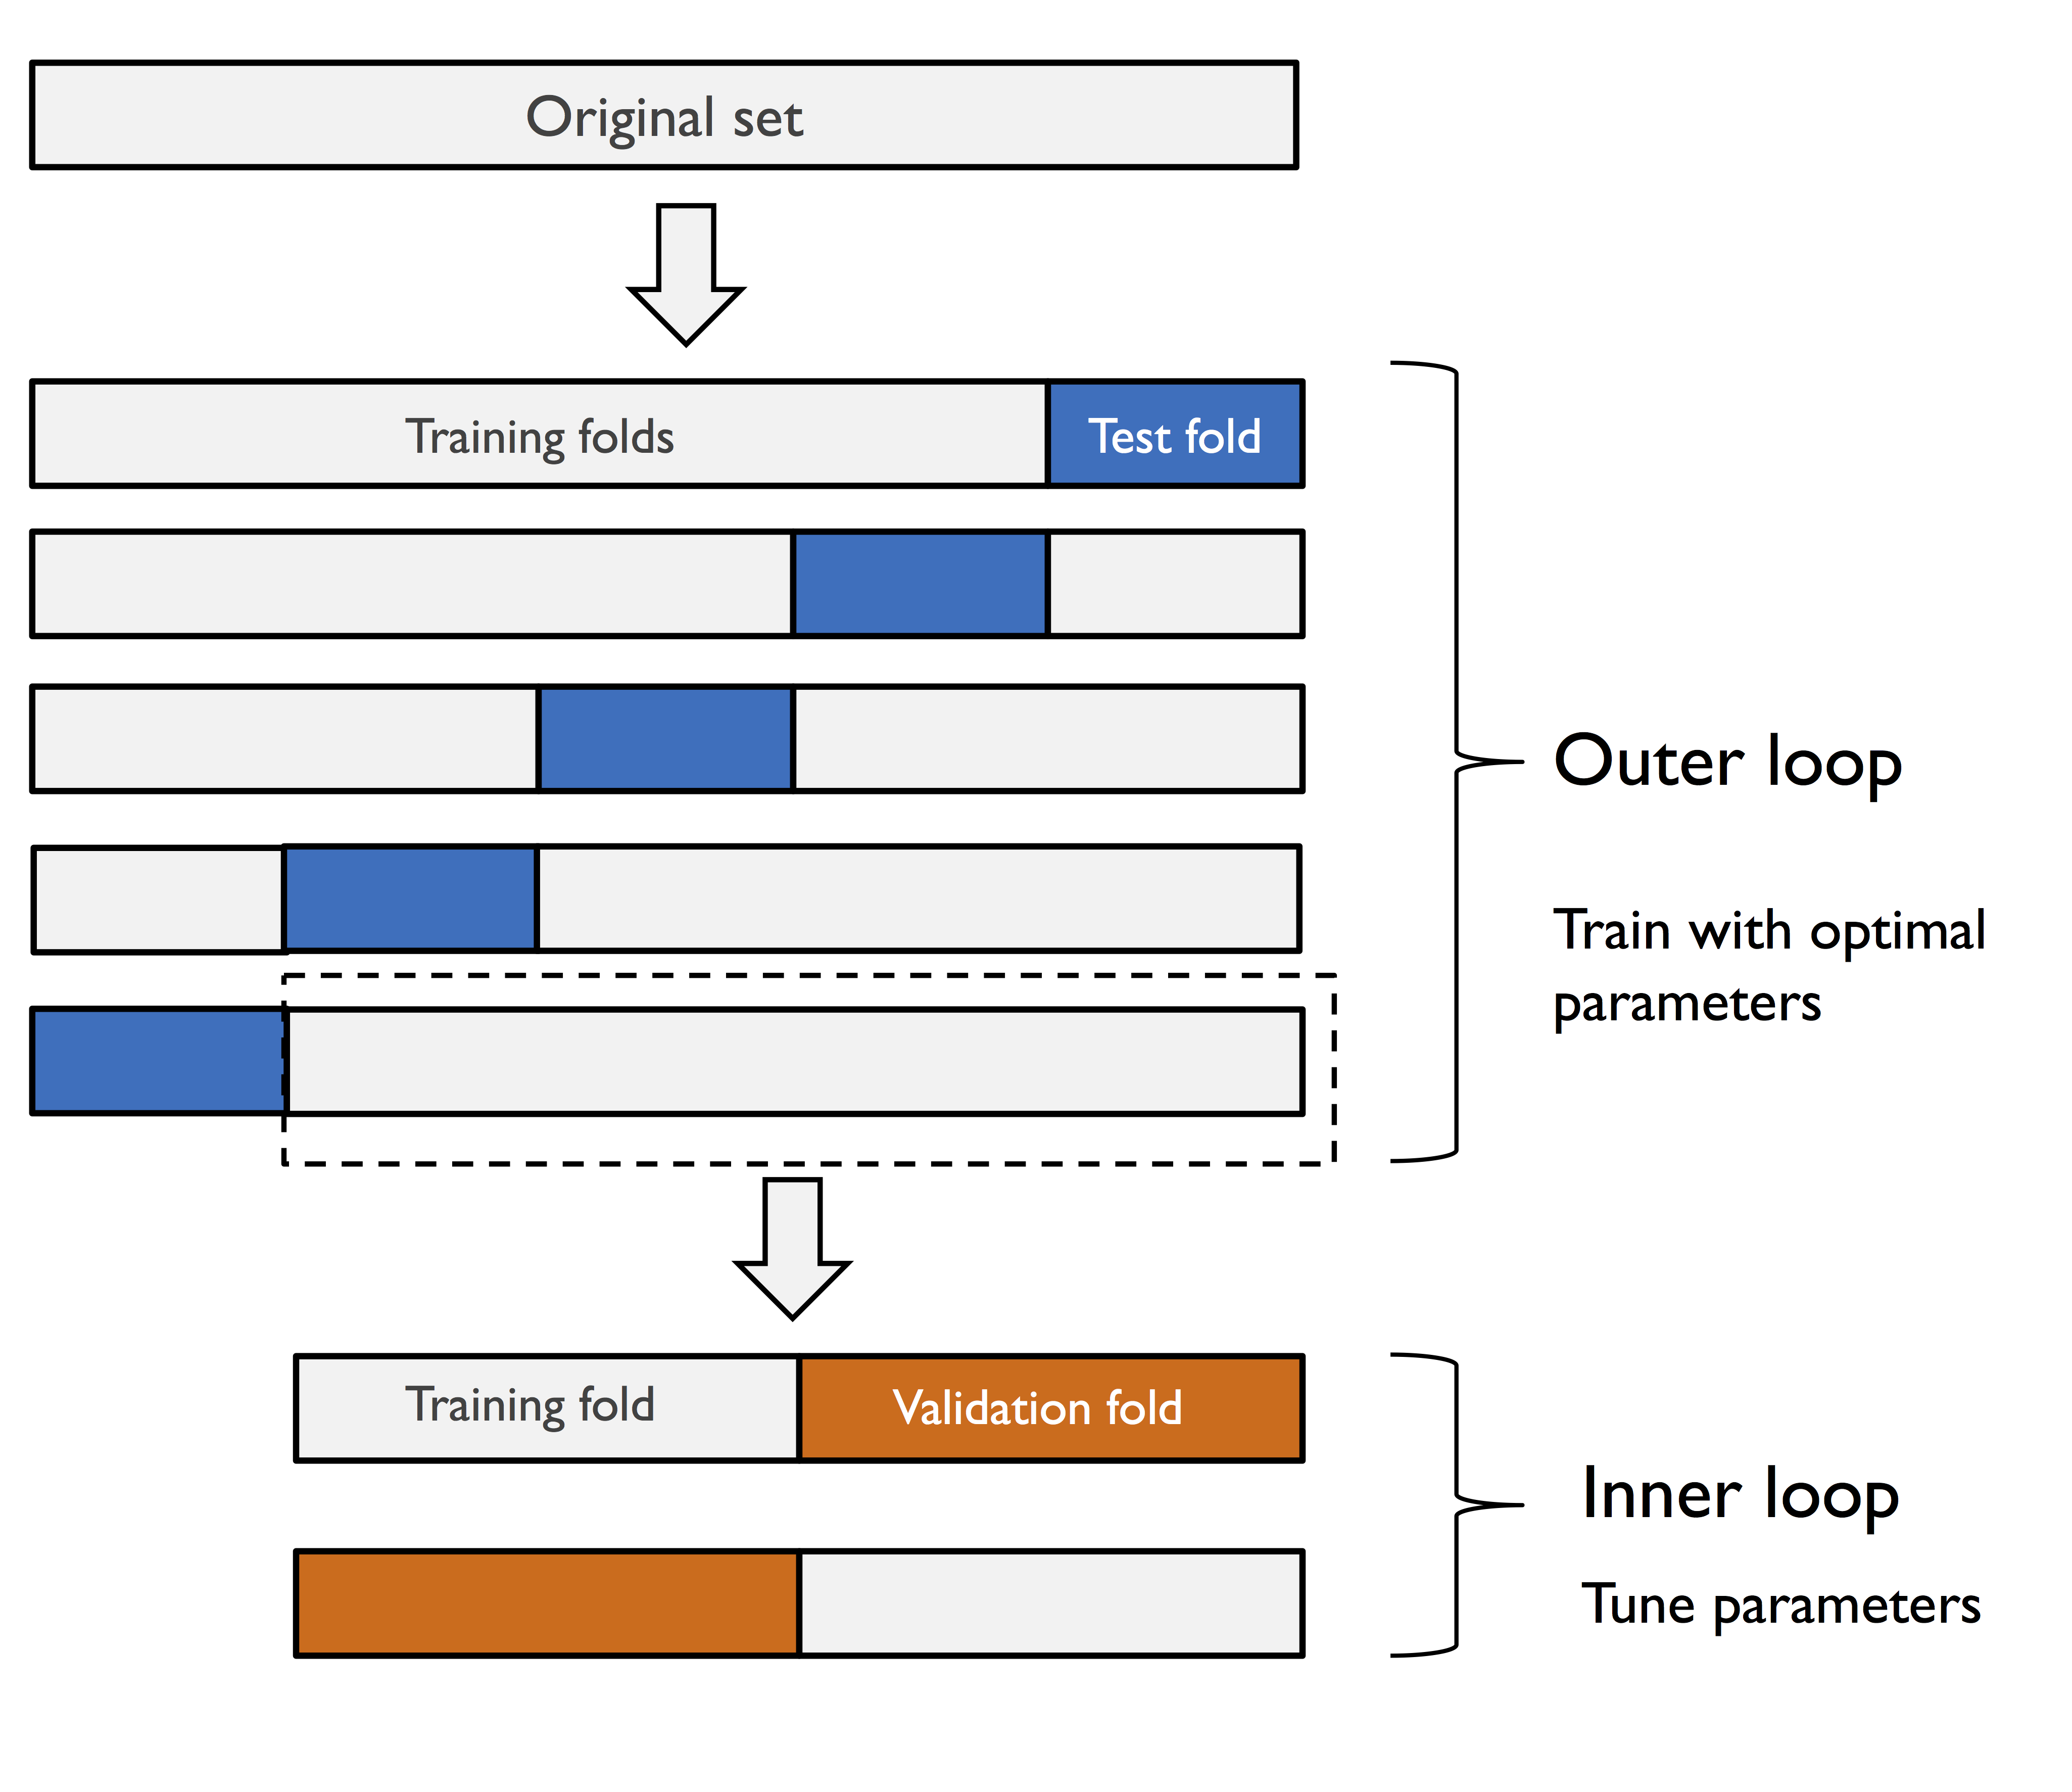

Con pipeline per [`PassiveAggressiveClassifier`](https://scikit-learn.org/stable/modules/linear_model.html#passive-aggressive) (variante di `Perceptron`)

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline

pipe_pac = Pipeline([('scaler', StandardScaler()), ('pac', PassiveAggressiveClassifier(max_iter=2000))])

param_grid = [{'pac__C': [0.000001,0.1,0.25,0.5,0.75,1.0], 
               'pac__tol': param_range, 
               'pac__loss': ['squared_hinge']},
              {'pac__C': [0.000001,0.1,0.25,0.5,0.75,1.0], 
               'pac__tol': param_range
              },
              # 'hinge' default
             ]

gs = GridSearchCV(estimator=pipe_pac,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=2)
gs = gs.fit(X_train, y_train)
print(gs.best_estimator_)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)

print(scores)
print('Accuratezza media (CV su train): %.3f +/- %.3f' % (scores.mean(), scores.std()))

Pipeline(steps=[('scaler', StandardScaler()),
                ('pac',
                 PassiveAggressiveClassifier(C=0.1, max_iter=2000,
                                             tol=1000.0))])
[0.97802198 0.96703297 0.94505495 0.97802198 0.94505495]
Accuratezza media (CV su train): 0.963 +/- 0.015


Analogamente su alberi di decisione, regolando il parametro della profondità

In [25]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('Accuratezza media (CV su train): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuratezza media (CV su train): 0.934 +/- 0.016


## Metriche di Valutazione delle Prestazioni

### Matrice di Confusione

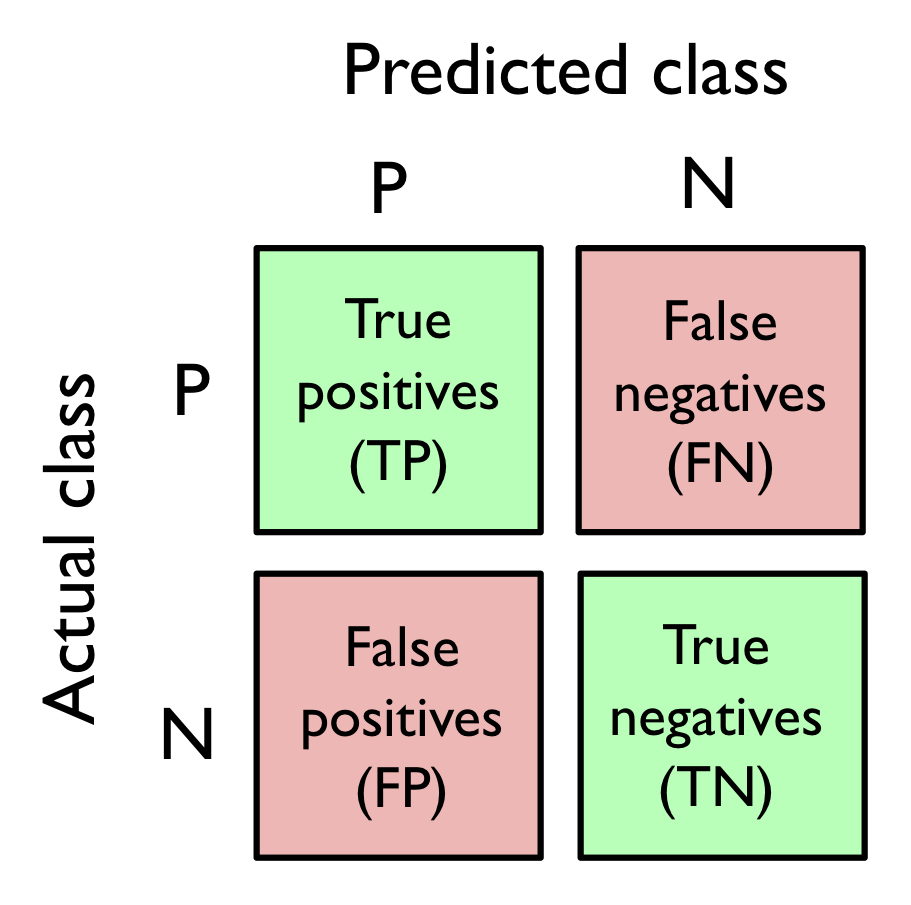

In [26]:
from sklearn.metrics import confusion_matrix

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 1 41]]


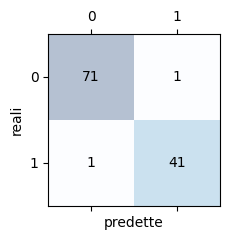

In [27]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predette')
plt.ylabel('reali')
plt.tight_layout()

### Nota

etichette per la classificazione: associando *Malignant* a `1` e *Benign* a `0`

In [28]:
le.transform(['M', 'B'])

array([1, 0])

Stampa della *matrice di confusione*:

In [29]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 1 41]]


+ in (`0, 0`), riquadro superiore sinistro,<br> numero di esempi di classe `0` (negativi) correttamente predetti (TN)

Per cambiare l'ordine, si può usare il parametro `labels`:

In [30]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[41  1]
 [ 1 71]]


In conclusione (assumendo la classe `1` (`"malignant"`) come positiva):

+ il modello ha classificato *correttamente*:
    - 71 esempi di classe `0` (TN) e 40 di classe `1` (TP) 
+ Il modello ha però *misclassificato*: 
    - 1 esempio di classe `0` (FP) e 2 esempi di classe `1`  (FN)

## Ottimizzare Precisione e Richiamo

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('P: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('R: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

P: 0.976
R: 0.976
F1: 0.976


In [32]:
from sklearn.metrics import make_scorer

pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(max_iter=2000,random_state=42))

range1 = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
range2 = [0.000001,0.1,0.25,0.5,0.75,1.0]
param_grid = [{'logisticregression__C': range1, 
               'logisticregression__tol': range2, 
               'logisticregression__solver': ['lbfgs','liblinear','newton-cg']
              }]

scorer = make_scorer(f1_score, pos_label=0)

gs = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print('modello migliore:',gs.best_estimator_)
print('valutazione (f1):',gs.best_score_)

modello migliore: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=2000, random_state=42,
                                    solver='liblinear', tol=1e-06))])
valutazione (f1): 0.984677045144608


## Valutazione tramite curve ROC

### **Curva ROC**  

**Receiver Operating Characteristic**: plot $FPR\times TPR$

- $FPR = \dfrac{FP}{FP+TN}$ 

&nbsp;

- $TPR = \dfrac{TP}{FN+TP}$

In [33]:
from sklearn.metrics import roc_curve, auc
from numpy import interp #alt.: from scipy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

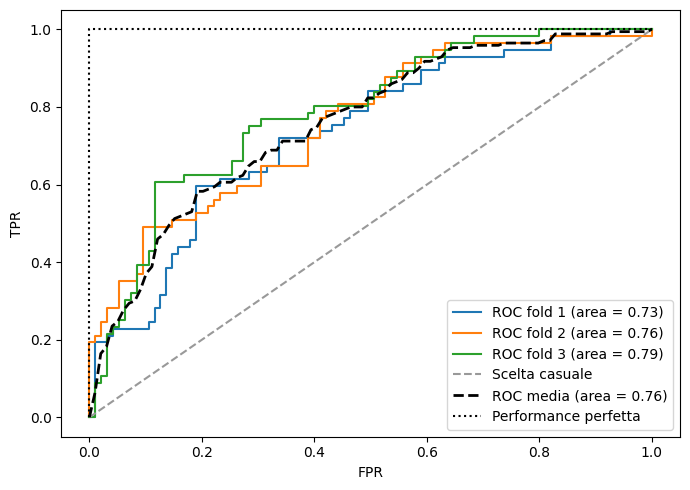

In [34]:
fig = plt.figure(figsize=(7, 5))
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Scelta casuale')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='ROC media (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Performance perfetta')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Altre funzioni **Display**

- `calibration.CalibrationDisplay(prob_true, ...)` <br> curva di calibrazione (reliability diagram) visualizzazione
- `inspection.PartialDependenceDisplay(...[, ...])` <br> Partial Dependence Plot (PDP)
- `inspection.DecisionBoundaryDisplay(*, xx0, ...)` <br> visualizzazione dei confini di decisione 
- `metrics.ConfusionMatrixDisplay(...[, ...])` <br> visualizzazione della matrice di confusione 
- `metrics.DetCurveDisplay(*, fpr, fnr[, ...])` <br> visualizzazione della curva DET
- `metrics.PrecisionRecallDisplay(precision, ...)` <br> visualizzazione Precisione-Richiamo
- `metrics.PredictionErrorDisplay(*, y_true, y_pred)` <br> visualizzazione dell'errore di predizione di un mod. di regressione
- `metrics.RocCurveDisplay(*, fpr, tpr[, ...])` <br> visualizzazione della curva ROC
- `model_selection.LearningCurveDisplay(*, ...)` <br> visualizzazione della curva di Learning 

## Metriche per Problemi Multiclasse

+ *micro averaging*: stesso peso alle istanze  $\displaystyle {\rm PRE}_{micro} = \dfrac{TP_1+\cdots+TP_K}{TP_1+\cdots+TP_K+FP_1+\cdots+FP_K}$          

+ *macro averaging*: stesso peso alle classi precisione $\displaystyle {\rm PRE}_{macro} = \dfrac{1}{k}(PRE_1+\cdots+PRE_K)$

In [35]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

## Trattamento dello Sbilanciamento tra le Classi

In [36]:
# crea una versione sbilanciata del dataset
# con soli 40 es. di classe 1
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [37]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

np.float64(89.92443324937027)

In [38]:
from sklearn.utils import resample

print('# es. di classe 1 prima:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('# es. di classe 1 dopo:', X_upsampled.shape[0])

# es. di classe 1 prima: 40
# es. di classe 1 dopo: 357


In [39]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [40]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

np.float64(50.0)

Possibile usare tecniche più sofisticate di over-/under-sampling

## Approfondimenti 

dalla [doc](https://scikit-learn.org/stable/) sklearn

**Selezione e Valuazione di Modelli**
- [Cross-validation: valutare le prestazioni degli estimator](https://scikit-learn.org/stable/modules/cross_validation.html)
    - Calcolo metriche via CV; Iteratori per la CV; Shuffling; CV e Model Selection; Test score da permutazione
- [Tuning degli iper-parameteri di un estimator](https://scikit-learn.org/stable/modules/grid_search.html)
    - Grid Search esaustiva; Ottimizzazione parametri randomizzata; Ricerca di parametri ottimali tramite dimezzamenti successivi; Suggerimenti per la ricerca; Alternative alla ricerca a forza bruta
- [Metriche e punnteggi: quantificazione della qualità delle predizioni](https://scikit-learn.org/stable/modules/model_evaluation.html)
    - parametro di scoring: definizione delle regole di valutazione del modello; Metriche di classificazione, di ranking multi-etichetta, di regressione, clustering;  estimator dummy
- [Curve di validazione: tracciare punteggi per valutare modelli](https://scikit-learn.org/stable/modules/learning_curve.html)
    - Curve di validazione e di apprendimento 

## Discriminazione Logistica

`LogisticRegression` implementa la __discriminazione logistica__, nota anche come _regressione logit_, _classificazione a massima entropia_ (o _MaxEnt_) o _classificatore log-lineare_

- probabilità dei possibili output modellate utilizzando una funzione logistica
- copre i casi _binari_, _One-vs-Rest_ o _multinomiali_, opzionalmente con _regolarizzazione_  L1, L2 o _Elastic-Net_

### Esempio | Discriminazione Logistica con regolarizzazione L1 e L2

dalla [doc](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#)

Confronto della _sparsità_ (percentuale di coefficienti nulli) utilizzando penalità L1, L2 e Elastic-Net per diversi valori di `C`, parametro di regolarizzazione (inverso)

Si classificano immagini 8x8 delle cifre in due classi: `0`-`4` e `5`-`9`
- con penalità L1, soluzioni più sparse, <br> con Elastic-Net sparsità a metà tra quelle di L1 e L2
- si mostrano i coefficienti dei modelli al variare di `C`
    - valori grandi di `C` danno al modello maggiore libertà;
    - valori più piccoli lo vincolano maggiormente 

C = 1.00
Sparsità con L1:                         6.25%
Sparsità con Elastic-Net:                4.69%
Sparsità con L2:                         4.69%
Score con L1:                            0.90
Score con Elastic-Net:                   0.90
Score con L2:                            0.90
C = 0.10
Sparsità con L1:                         28.12%
Sparsità con Elastic-Net:                12.50%
Sparsità con L2:                         4.69%
Score con L1:                            0.90
Score con Elastic-Net:                   0.90
Score con L2:                            0.90
C = 0.01
Sparsità con L1:                         82.81%
Sparsità con Elastic-Net:                68.75%
Sparsità con L2:                         4.69%
Score con L1:                            0.86
Score con Elastic-Net:                   0.88
Score con L2:                            0.89


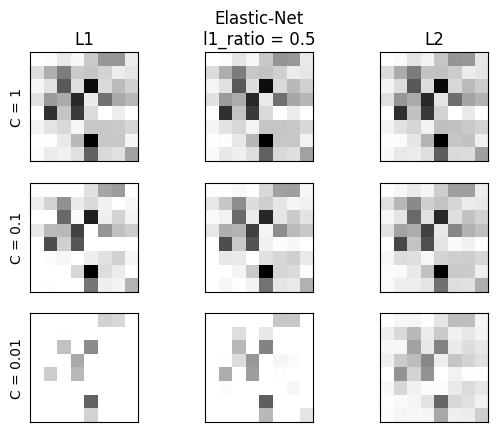

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classifica in cifre piccole 0-4 e grandi 5-9
y = (y > 4).astype(int)

l1_ratio = 0.5  # peso L1 nell'Elastic-Net 

fig, axes = plt.subplots(3, 3)

# imposta i param di regolarizatione
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # aumenta la tolerance per diminuire il tempo per il training 
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(C=C, penalty="elasticnet", solver="saga", 
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contiene zeri per la sparsità indotta dalla norma L1 

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C = %.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsità con L1:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsità con Elastic-Net:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsità con L2:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score con L1:", clf_l1_LR.score(X, y)))
    print(
        "{:<40} {:.2f}".format("Score con Elastic-Net:", clf_en_LR.score(X, y))
    )
    print("{:<40} {:.2f}".format("Score con L2:", clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel("C = %s" % C)

plt.show()

## Esempio | Regressione Logistica Multiclasse

/home/nico/micromamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/nico/micromamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


training score : 0.995 (multinomial)
training score : 0.976 (ovr)


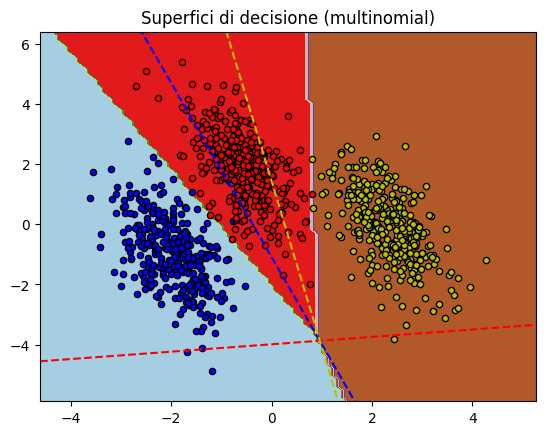

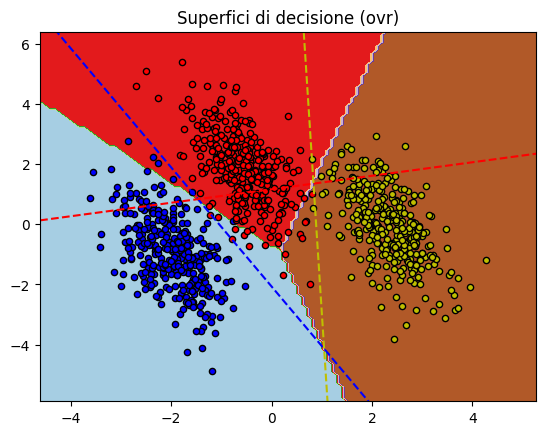

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# funzione per tracciare iperpiani
def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


# crea il dataset con 3 classi
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(solver="sag", max_iter=100, random_state=42, 
                             multi_class=multi_class).fit(X, y)

    # stampa gli score per il training
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", 
                                           cmap=plt.cm.Paired, ax=ax)
    plt.title("Superfici di decisione (%s)" % multi_class)
    plt.axis("tight")

    # traccia i punti (training)
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor="black", s=20)

    # mostra i 3 classificatori one-against-all 
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

### Altri esempi

Si vedano anche 

- [LR multiclasse sparsa su `20newgroups`](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_20newsgroups.html)
- [LR multinomiale e reg. L1 su `MNIST`](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)



## Modelli Basati su SGD

__Stochastic Gradient Descent__ (SGD) approccio semplice ma molto efficiente per modelli lineari con loss convesse (SVM e LogReg)

- applicato con successo a problemi di apprendimento automatico su larga scala e sparsi, come classificazione di testi e NLP
- dati sparsi $\to$ classificatori facilmente scalabili a problemi con $d,N \approx 10^5+$ 

Un'istanza di `SGDClassifier` o `SGDRegressor` può avere equivalenti in scikit-learn, che potenzialmente usa una tecnica di ottimizzazione diversa: ad es., `SGDClassifier(loss='log_loss')` per la regressione logistica in `LogisticRegression` con ottimizatore basato su SGD invece di uno degli altri solutori previsti;  analogamente, `SGDRegressor(loss='squared_error', penalty='l2')` equivalente a `Ridge` 

- vantaggi: efficienza, facilità di implementazione
- svantaggi: richiede una serie di iperparametri (e.g. parametro di regolarizzazione e numero di iterazioni), sensibilità a feature con scale diverse

### Esempi con `SGDClassifier`

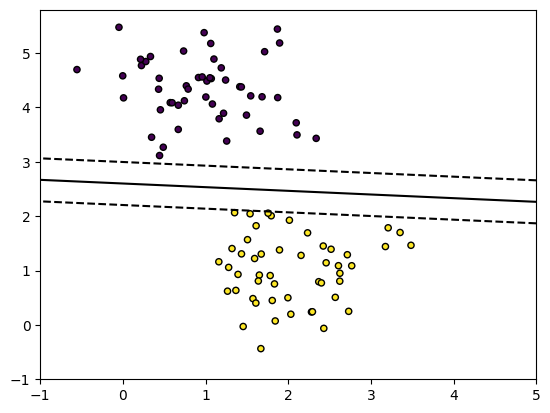

In [43]:
# Es. SGD per determinare l'iperpiano separatore a massimo margine

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier

# crea es. separabili
X, Y = make_blobs(n_samples=100, centers=2, 
                  random_state=0, cluster_std=0.60)

# training
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

# mostra punti e separatori
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

### Esempio con Iris

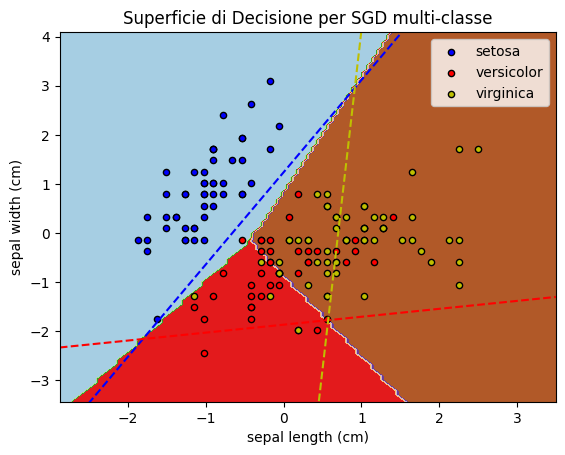

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()

# si considerano solo le prime 2 feature
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# mescola gli esempi
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardizzazione
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# mostra anche gli es. di training 
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        #cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Superficie di Decisione per SGD multi-classe")
plt.axis("tight")

# mostra i 3 classifificatori one-against-all
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

### Esempio: Pesatura delle istanze

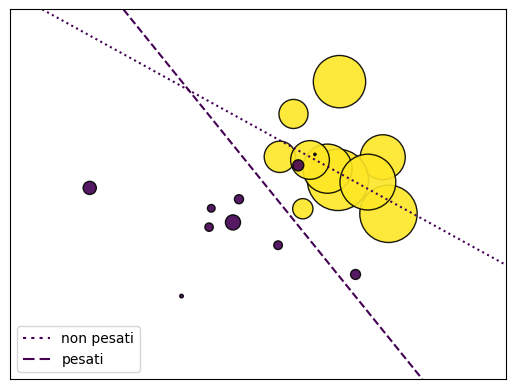

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# crea 20 esempi
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# assignando un peso maggiore agli ultimi 10 
sample_weight[:10] *= 10

# mostra i punti pesati
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9, edgecolor="black",)

# addestra il modello non pesato 
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["dotted"])

# addestra il modello pesato 
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["dashed"])

no_weights_handles, _ = no_weights.legend_elements()
weights_handles, _ = samples_weights.legend_elements()
ax.legend([no_weights_handles[0], weights_handles[0]],
          ["non pesati", "pesati"],loc="lower left",)

ax.set(xticks=(), yticks=())
plt.show()

### Altri Esempi

- [SGD vs altri ottimizzatori online](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html) 
- [Benchmark su `20newsgroups`](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#)